In [182]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [183]:
import pandas as pd

df = pd.read_csv("/Users/selinozkan/project1/MyFirstNotebook/datasets/la_crime_data/Crime_Data_from_2020_to_Present.csv")
df.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757141 entries, 0 to 757140
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           757141 non-null  int64  
 1   Date Rptd       757141 non-null  object 
 2   DATE OCC        757141 non-null  object 
 3   TIME OCC        757141 non-null  int64  
 4   AREA            757141 non-null  int64  
 5   AREA NAME       757141 non-null  object 
 6   Rpt Dist No     757141 non-null  int64  
 7   Part 1-2        757141 non-null  int64  
 8   Crm Cd          757141 non-null  int64  
 9   Crm Cd Desc     757141 non-null  object 
 10  Mocodes         653226 non-null  object 
 11  Vict Age        757141 non-null  int64  
 12  Vict Sex        658230 non-null  object 
 13  Vict Descent    658224 non-null  object 
 14  Premis Cd       757132 non-null  float64
 15  Premis Desc     756699 non-null  object 
 16  Weapon Used Cd  263079 non-null  float64
 17  Weapon Des

In [185]:
df.describe()


,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.571410e+05,757141.000000,757141.000000,757141.000000,757141.000000,757141.000000,757141.000000,757132.000000,263079.000000,757131.000000,56016.000000,1872.000000,56.000000,757141.000000,757141.000000
mean,2.148771e+08,1334.814871,10.718368,1118.245674,1.415613,500.847668,29.909412,305.938960,362.590230,500.589136,957.298861,983.676282,990.232143,33.971554,-117.999799
std,1.033130e+07,653.847053,6.092302,609.235556,0.492828,207.952490,21.731307,216.793004,123.737617,207.743554,111.871937,51.356926,28.834317,1.864571,6.465919
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.021135e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429500
50%,2.119136e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.215089e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [186]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [187]:

print(df.isnull().sum())


DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103915
Vict Age               0
Vict Sex           98911
Vict Descent       98917
Premis Cd              9
Premis Desc          442
Weapon Used Cd    494062
Weapon Desc       494062
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          701125
Crm Cd 3          755269
Crm Cd 4          757085
LOCATION               0
Cross Street      635409
LAT                    0
LON                    0
dtype: int64


In [188]:
df = df.drop(columns=[
    'Mocodes', 
    'Weapon Used Cd', 
    'Weapon Desc',
    'Crm Cd 2', 
    'Crm Cd 3', 
    'Crm Cd 4', 
    'Cross Street'
])



In [189]:
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')
df['Vict Descent'] = df['Vict Descent'].fillna('Unknown')
df['Premis Desc'] = df['Premis Desc'].fillna('Unknown')
df['Premis Cd'] = df['Premis Cd'].fillna(-1)
df['Crm Cd 1'] = df['Crm Cd 1'].fillna(-1)


In [190]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


In [191]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

df = df.dropna(subset=['DATE OCC'])


df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day          
df['dayofweek'] = df['DATE OCC'].dt.dayofweek  
df['hour'] = df['TIME OCC'] // 100



/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/2025233461.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


In [192]:
df[['DATE OCC', 'year', 'month', 'day', 'dayofweek', 'TIME OCC', 'hour']].head()


,DATE OCC,year,month,day,dayofweek,TIME OCC,hour
0,2020-01-08,2020,1,8,2,2230,22
1,2020-01-01,2020,1,1,2,330,3
2,2020-02-13,2020,2,13,3,1200,12
3,2020-01-01,2020,1,1,2,1730,17
4,2020-01-01,2020,1,1,2,415,4


In [193]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,day,dayofweek,hour
0,10304468,01/08/2020 12:00:00 AM,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,8,2,22
1,190101086,01/02/2020 12:00:00 AM,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,1,2,3
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,13,3,12
3,191501505,01/01/2020 12:00:00 AM,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,1,2,17
4,191921269,01/01/2020 12:00:00 AM,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,1,2,4


/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/1628307894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="viridis")


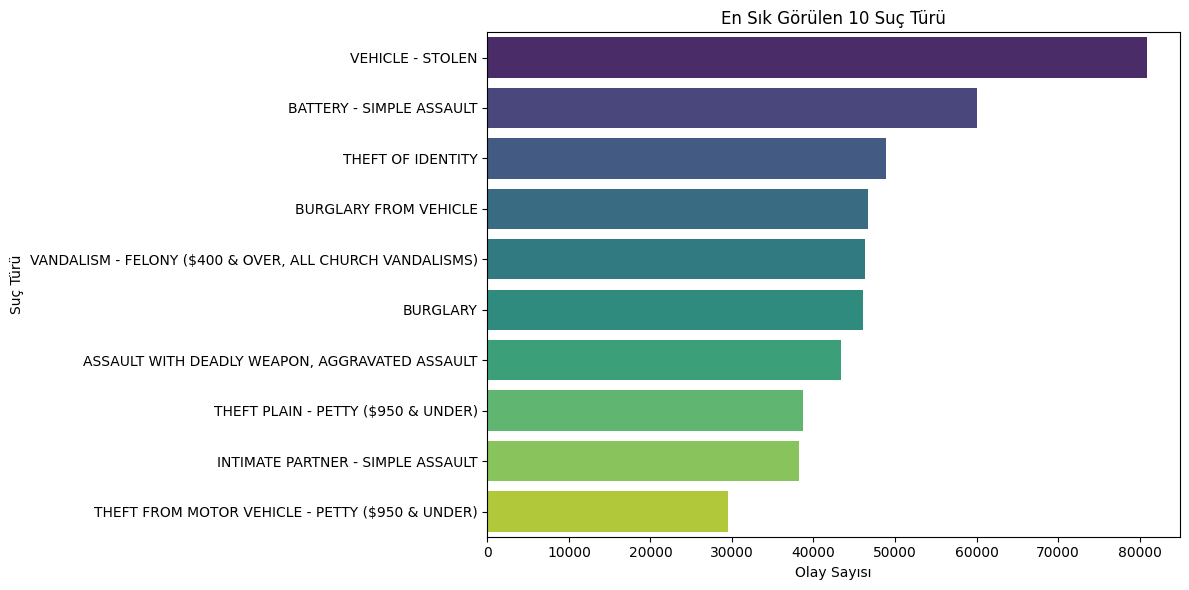

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

top_crimes = df['Crm Cd Desc'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="viridis")
plt.title("En Sık Görülen 10 Suç Türü")
plt.xlabel("Olay Sayısı")
plt.ylabel("Suç Türü")
plt.tight_layout()
plt.savefig("top_crimes.png",dpi=300, bbox_inches='tight')
plt.show()


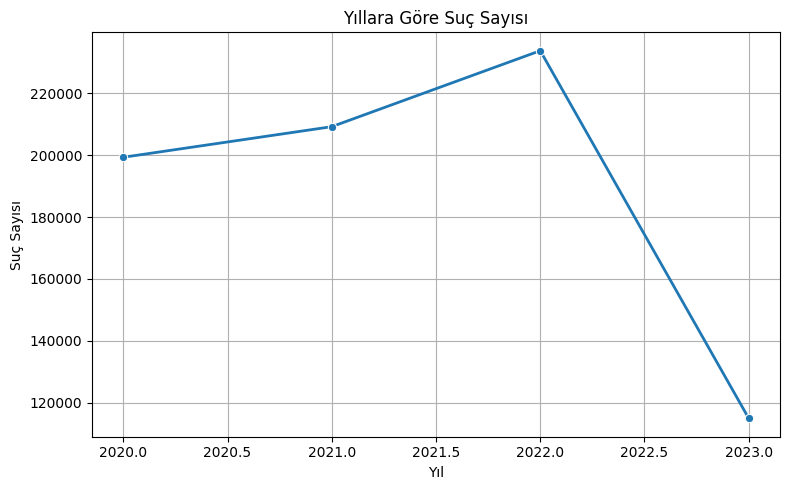

In [195]:
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker="o", linewidth=2)
plt.title("Yıllara Göre Suç Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Suç Sayısı")
plt.grid(True)
plt.tight_layout()
plt.savefig("yearly_counts.png", dpi=300, bbox_inches='tight')
plt.show()



/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/4170544215.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="mako")


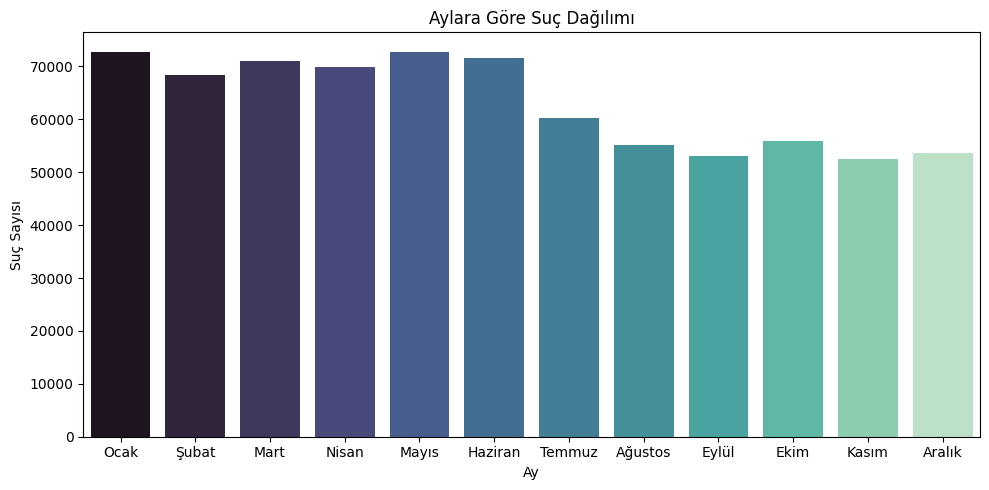

In [196]:
monthly_counts = df['month'].value_counts().sort_index()

ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="mako")
plt.title("Aylara Göre Suç Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Suç Sayısı")
plt.xticks(ticks=range(12), labels=ay_isimleri)
plt.tight_layout()
plt.savefig("monthly_counts.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/590600712.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gunler, y=dayofweek_counts.values, palette="cubehelix")


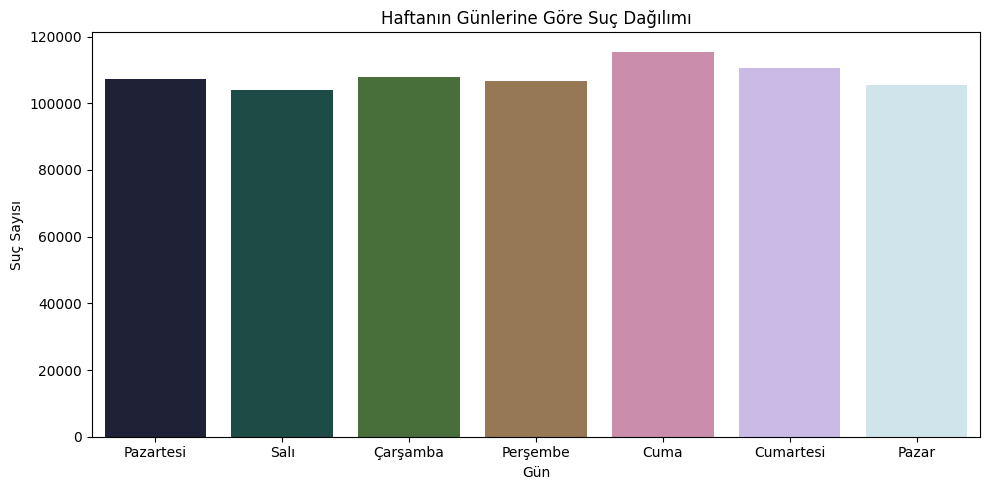

In [197]:
gunler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

dayofweek_counts = df['dayofweek'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=gunler, y=dayofweek_counts.values, palette="cubehelix")
plt.title("Haftanın Günlerine Göre Suç Dağılımı")
plt.xlabel("Gün")
plt.ylabel("Suç Sayısı")
plt.tight_layout()
plt.savefig("dayofweek_counts.png", dpi=300, bbox_inches='tight')
plt.show()


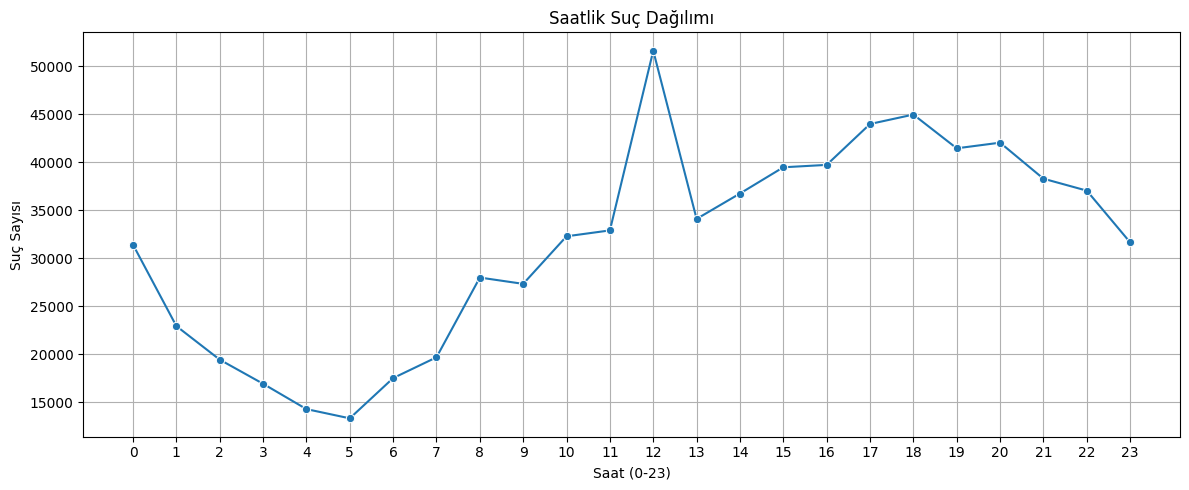

In [198]:

hourly_counts = df['hour'].value_counts().sort_index()


plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title("Saatlik Suç Dağılımı")
plt.xlabel("Saat (0-23)")
plt.ylabel("Suç Sayısı")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.savefig("hourly_counts.png", dpi=300, bbox_inches='tight')
plt.show()



/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/123869512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.values, y=area_counts.index, palette="rocket")


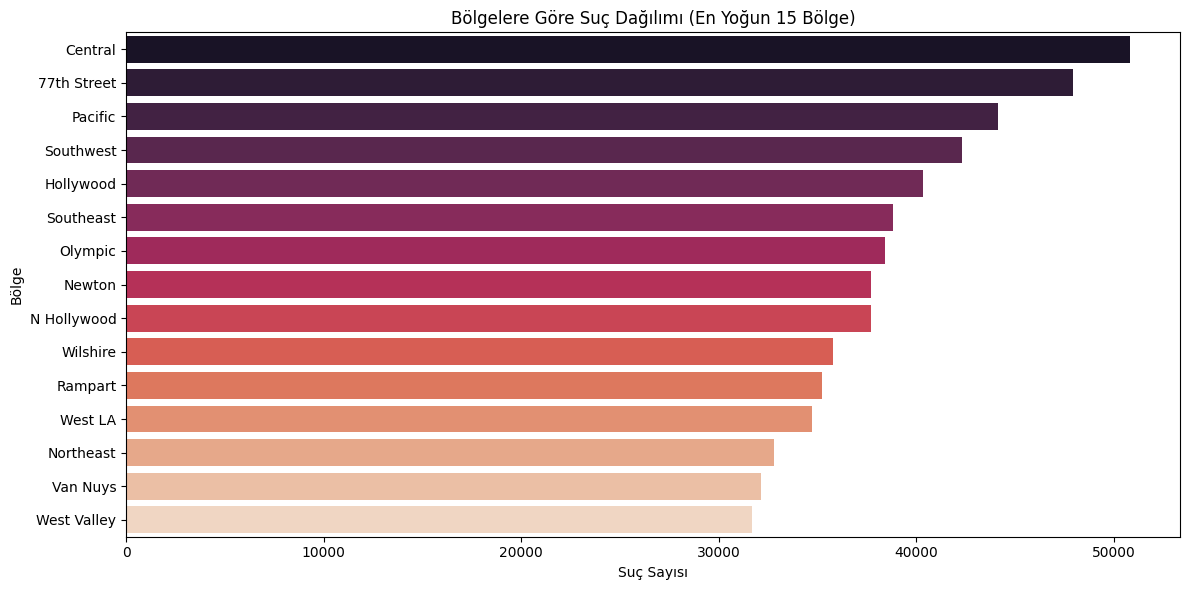

In [199]:
area_counts = df['AREA NAME'].value_counts().head(15)  

plt.figure(figsize=(12,6))
sns.barplot(x=area_counts.values, y=area_counts.index, palette="rocket")
plt.title("Bölgelere Göre Suç Dağılımı (En Yoğun 15 Bölge)")
plt.xlabel("Suç Sayısı")
plt.ylabel("Bölge")
plt.tight_layout()
plt.savefig("area_counts.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/846168279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="Set2")


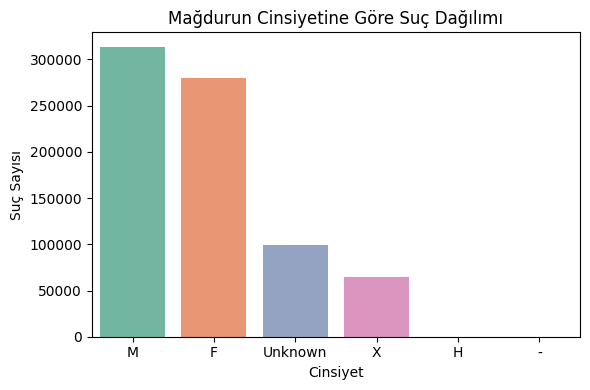

In [200]:
sex_counts = df['Vict Sex'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="Set2")
plt.title("Mağdurun Cinsiyetine Göre Suç Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Suç Sayısı")
plt.tight_layout()
plt.savefig("victim_sex_counts.png", dpi=300, bbox_inches='tight')
plt.show()



/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_32797/2440513107.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=descent_counts.index, y=descent_counts.values, palette="coolwarm")


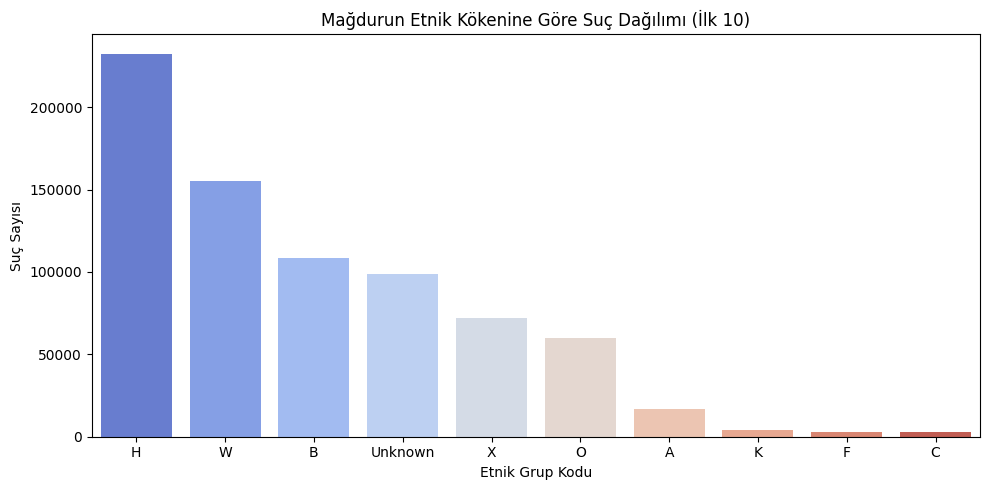

In [201]:
descent_counts = df['Vict Descent'].value_counts().head(10)  # ilk 10 etnik grup


plt.figure(figsize=(10,5))
sns.barplot(x=descent_counts.index, y=descent_counts.values, palette="coolwarm")
plt.title("Mağdurun Etnik Kökenine Göre Suç Dağılımı (İlk 10)")
plt.xlabel("Etnik Grup Kodu")
plt.ylabel("Suç Sayısı")
plt.tight_layout()
plt.savefig("victim_descent_counts.png", dpi=300, bbox_inches='tight')
plt.show()


In [202]:
import folium
from folium.plugins import MarkerCluster

la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

marker_cluster = MarkerCluster().add_to(la_map)

for i, row in df[['LAT', 'LON', 'Crm Cd Desc']].dropna().head(500).iterrows():
    folium.Marker(
        location=[row['LAT'], row['LON']],
        popup=row['Crm Cd Desc'],
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

la_map


In [203]:
la_map.save("la_crime_map.html")


In [204]:
from sklearn.cluster import KMeans
import numpy as np


In [205]:
coords = df[['LAT', 'LON']].dropna().sample(1000, random_state=42)  
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(coords)

coords['cluster'] = kmeans.labels_



In [206]:
cluster_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    cluster = coords[coords['cluster'] == i]
    for _, row in cluster.iterrows():
        folium.CircleMarker(
            location=[row['LAT'], row['LON']],
            radius=2,
            color=colors[i],
            fill=True,
            fill_color=colors[i],
            fill_opacity=0.6
        ).add_to(cluster_map)

cluster_map


In [207]:
cluster_map.save("la_crime_clusters.html")

In [208]:
selected_features = ['hour', 'dayofweek', 'AREA', 'Vict Sex', 'Vict Descent']

target_variable = 'Part 1-2' 

data = df[selected_features + [target_variable]].dropna()


In [209]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Vict Sex', 'Vict Descent']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

if data[target_variable].dtype == 'object':
    target_encoder = LabelEncoder()
    data[target_variable] = target_encoder.fit_transform(data[target_variable])


In [210]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


X = data[selected_features]
y = data[target_variable]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.636463293028416
              precision    recall  f1-score   support

           1       0.68      0.72      0.70     88418
           2       0.57      0.53      0.55     63011

    accuracy                           0.64    151429
   macro avg       0.62      0.62      0.62    151429
weighted avg       0.63      0.64      0.63    151429



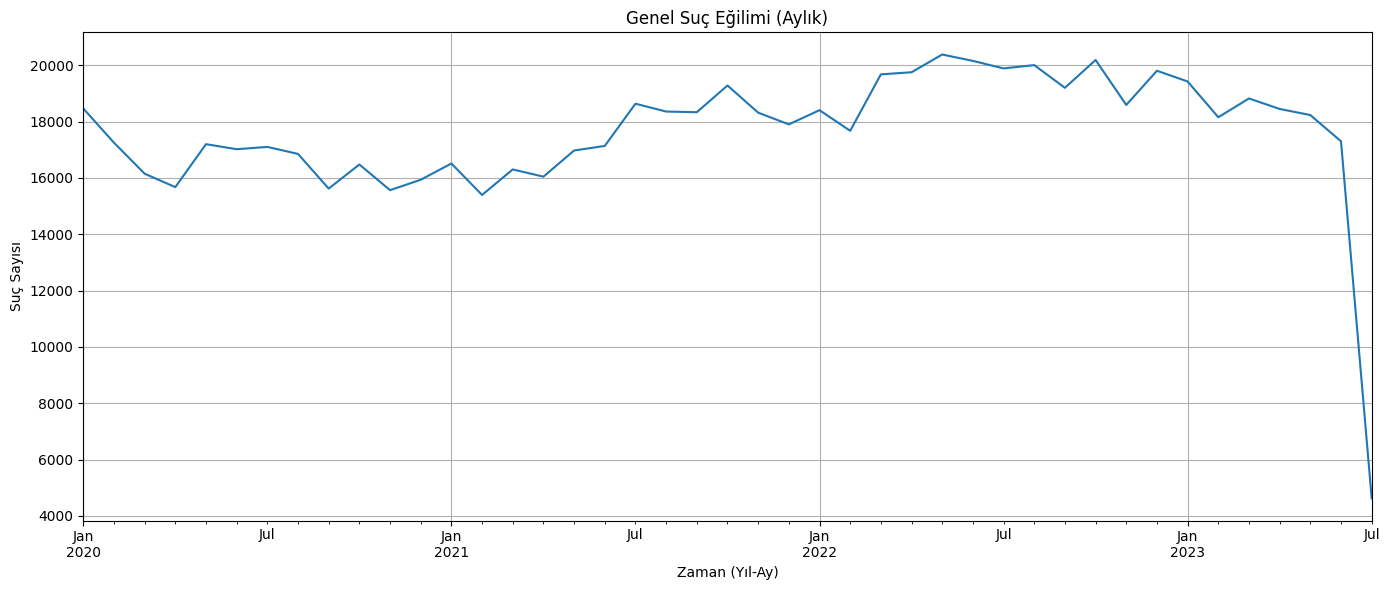

In [211]:
df['year_month'] = df['DATE OCC'].dt.to_period('M')

monthly_trend = df.groupby('year_month').size()


plt.figure(figsize=(14,6))
monthly_trend.plot()
plt.title("Genel Suç Eğilimi (Aylık)")
plt.xlabel("Zaman (Yıl-Ay)")
plt.ylabel("Suç Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()


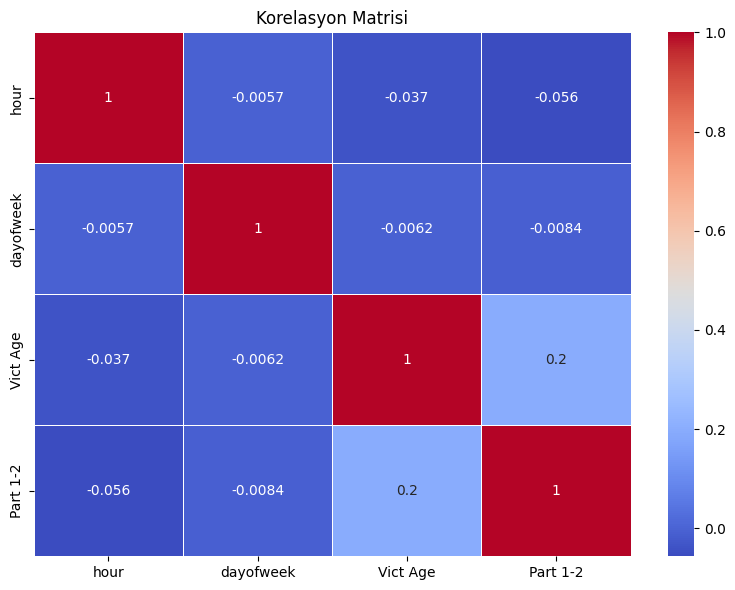

In [212]:
numeric_df = df[['hour', 'dayofweek', 'Vict Age', 'Part 1-2']].dropna()

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


In [213]:
from sklearn.ensemble import IsolationForest

features = df[['hour', 'dayofweek', 'AREA']].dropna()

iso = IsolationForest(contamination=0.01, random_state=42)
features['anomaly'] = iso.fit_predict(features)

anomalies = features[features['anomaly'] == -1]

print("Anomali sayısı:", len(anomalies))


Anomali sayısı: 7483


In [214]:
df['year_month'] = df['DATE OCC'].dt.to_period('M')
monthly_data = df.groupby('year_month').size().reset_index(name='crime_count')
monthly_data['year_month'] = monthly_data['year_month'].astype(str)


In [215]:
from sklearn.ensemble import IsolationForest

X = monthly_data[['crime_count']]

iso = IsolationForest(contamination=0.05, random_state=42)
monthly_data['anomaly'] = iso.fit_predict(X)

anomalous_months = monthly_data[monthly_data['anomaly'] == -1]



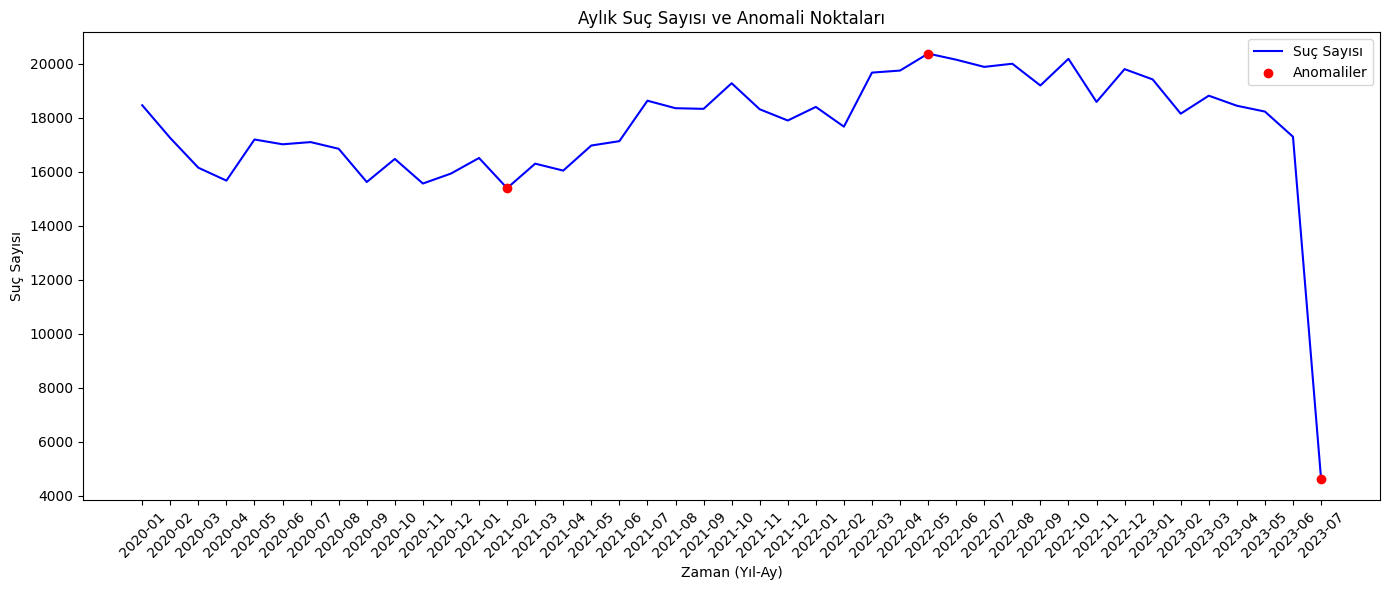

In [216]:
plt.figure(figsize=(14,6))

plt.plot(monthly_data['year_month'], monthly_data['crime_count'], label="Suç Sayısı", color='blue')

plt.scatter(anomalous_months['year_month'], anomalous_months['crime_count'], 
            color='red', label='Anomaliler', zorder=5)

plt.xticks(rotation=45)
plt.title("Aylık Suç Sayısı ve Anomali Noktaları")
plt.xlabel("Zaman (Yıl-Ay)")
plt.ylabel("Suç Sayısı")
plt.legend()
plt.tight_layout()
plt.savefig("anomalies.png", dpi=300, bbox_inches='tight')
plt.show()


In [217]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
daily_crime = df.groupby(df['DATE OCC'].dt.date).size().reset_index(name='crime_count')
daily_crime['DATE OCC'] = pd.to_datetime(daily_crime['DATE OCC'])


In [218]:
daily_crime['dayofweek'] = daily_crime['DATE OCC'].dt.dayofweek  
daily_crime['month'] = daily_crime['DATE OCC'].dt.month
daily_crime['year'] = daily_crime['DATE OCC'].dt.year


In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = daily_crime[['dayofweek', 'month', 'year']]
y = daily_crime['crime_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 Skoru:", model.score(X_test, y_test))


R^2 Skoru: 0.08659265256425375


In [220]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


dayofweek: 3.09
month: 1.91
year: 31.82


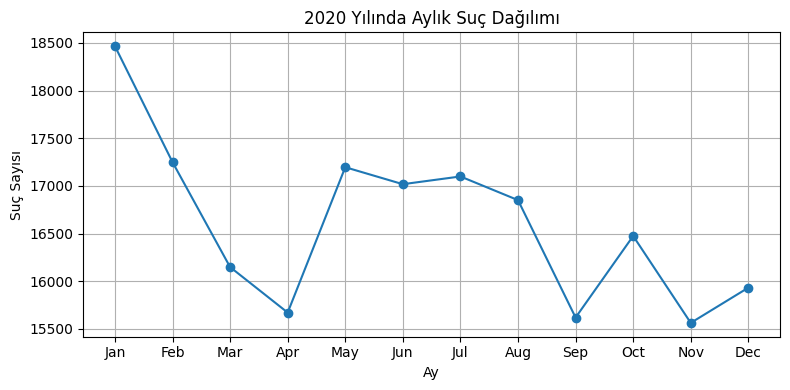

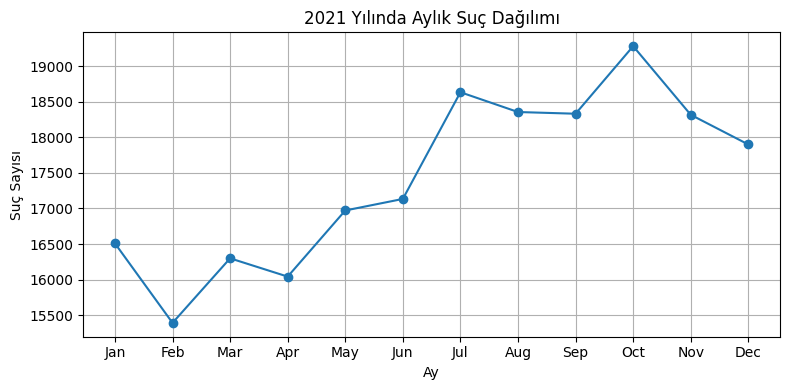

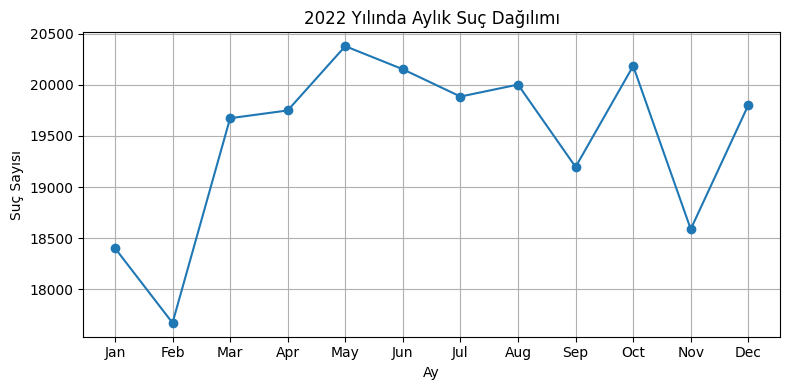

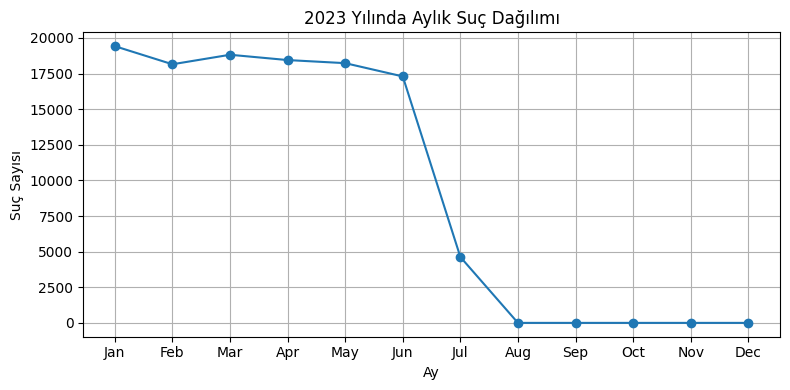

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

yearly_monthly_crime_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)

for year in yearly_monthly_crime_counts.index:
    monthly_data = yearly_monthly_crime_counts.loc[year]
    
    month_names = [pd.Timestamp(2000, m, 1).strftime('%b') for m in monthly_data.index]
    
    plt.figure(figsize=(8, 4))
    plt.plot(month_names, monthly_data.values, marker='o', linestyle='-')
    plt.title(f'{year} Yılında Aylık Suç Dağılımı')
    plt.xlabel('Ay')
    plt.ylabel('Suç Sayısı')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"monthly_crime_{year}.png", dpi=300, bbox_inches='tight')
    plt.show()
